In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from utils.audio import audio2mel, griffin_lim, deemphasis
from hparams import HParams, AudioCompression

In [2]:
audio, _ = librosa.load('003.0000.wav', sr=24000)

In [3]:
import IPython.display as ipd
ipd.Audio(audio, rate=24000)


In [4]:
mel = audio2mel(audio, hparams=HParams(
    sample_rate=24000,
    ref_level_db=20,
    audio_compression=AudioCompression.MU,
    n_fft=1024,
    hop_length=256,
    win_length=1024,
    n_mels=80,
))

In [5]:
output = griffin_lim(mel, hparams=HParams(
    sample_rate=24000,
    ref_level_db=20,
    audio_compression=AudioCompression.MU,
    n_fft=1024,
    hop_length=256,
    win_length=1024,
    n_mels=80,
))

In [6]:
import IPython.display as ipd
ipd.Audio(output, rate=24000)


In [7]:
s = librosa.util.abs2(librosa.stft(audio, n_fft=1024, hop_length=256, win_length=1024))
m = librosa.feature.melspectrogram(S=s, sr=24000, n_mels=80, hop_length=256, win_length=1024)

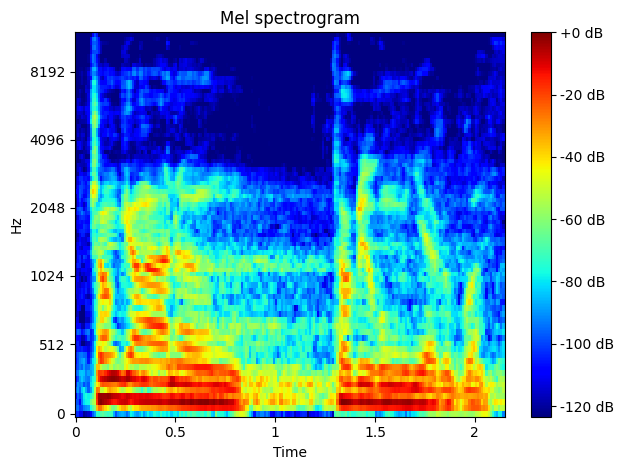

In [8]:
librosa.display.specshow(librosa.amplitude_to_db(m, ref=np.max, top_db=None),
                         sr=24000, hop_length=256, y_axis='mel', x_axis='time', cmap='jet')

plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [9]:
s = librosa.feature.inverse.mel_to_stft(m, sr=24000, n_fft=1024)
t = librosa.griffinlim(s)

In [10]:
import IPython.display as ipd
ipd.Audio(t, rate=24000)


In [16]:
import IPython.display as ipd
output = griffin_lim(
        m,
        hparams=HParams(
            sample_rate=24000,
            ref_level_db=20,
            audio_compression=AudioCompression.MU,
            n_fft=1024,
            hop_length=300,
            win_length=1200,
            n_mels=80,
        )
    )
ipd.Audio(output, rate=24000)
